Data can be found here: https://www.kaggle.com/datasets/uciml/faulty-steel-plates

In [7]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler


In [ ]:
# load and display the dataset
df = pd.read_csv('faults.csv')
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [ ]:
# general infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [ ]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} features, while having {df.isnull().sum().sum()} null values.')
print(f'Features have data type {df.dtypes.unique()[0]} and {df.dtypes.unique()[1]}.')

The dataset has 1941 rows and 34 features, while having 0 null values.
Features have data type int64 and float64.


In [ ]:
# statistics about the features
df.drop(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'], axis = 1).describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.033361,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.058961,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,0.001500,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,0.006600,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.010100,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.023500,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,0.875900,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000


In [ ]:
# lower the name of the columns
df.columns = map(str.lower, df.columns)

In [ ]:
target_cols = ['pastry', 
               'z_scratch', 
               'k_scatch', 
               'stains', 
               'dirtiness', 
               'bumps', 
               'other_faults'] # list of the anomalies features present in the dataset

feat_col = ['x_minimum', 
            'x_maximum', 
            'y_minimum', 
            'y_maximum', 
            'pixels_areas', 
            'x_perimeter', 
            'y_perimeter', 
            'sum_of_luminosity', 
            'minimum_of_luminosity', 
            'maximum_of_luminosity', 
            'length_of_conveyer', 
            'typeofsteel_a300', 
            'typeofsteel_a400', 
            'steel_plate_thickness', 
            'edges_index', 
            'empty_index', 
            'square_index', 
            'outside_x_index', 
            'edges_x_index', 
            'edges_y_index', 
            'outside_global_index', 
            'logofareas', 
            'log_x_index', 
            'log_y_index', 
            'orientation_index', 
            'luminosity_index', 
            'sigmoidofareas'] # list of the features of the steel plates

In [ ]:
# create a column encoding the anomalies features
# this is wrong from a model point of view, but it's useful for exploratory analysis
# it will be dropped in the future

enc_dict = {'pastry' : 0, 
            'z_scratch' : 1,
            'k_scatch' : 2, 
            'stains' : 3,
            'dirtiness' : 4, 
            'bumps' : 5, 
            'other_faults' : 6} # mapper for the encoding

df['anomaly'] = pd.from_dummies(df[target_cols]).replace(enc_dict)

/tmp/ipykernel_79736/3320159082.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['anomaly'] = pd.from_dummies(df[target_cols]).replace(enc_dict)


In [ ]:
# display how the anomalies are divided in the dataset
df['anomaly'].value_counts()

anomaly
6    673
5    402
2    391
1    190
0    158
3     72
4     55
Name: count, dtype: int64

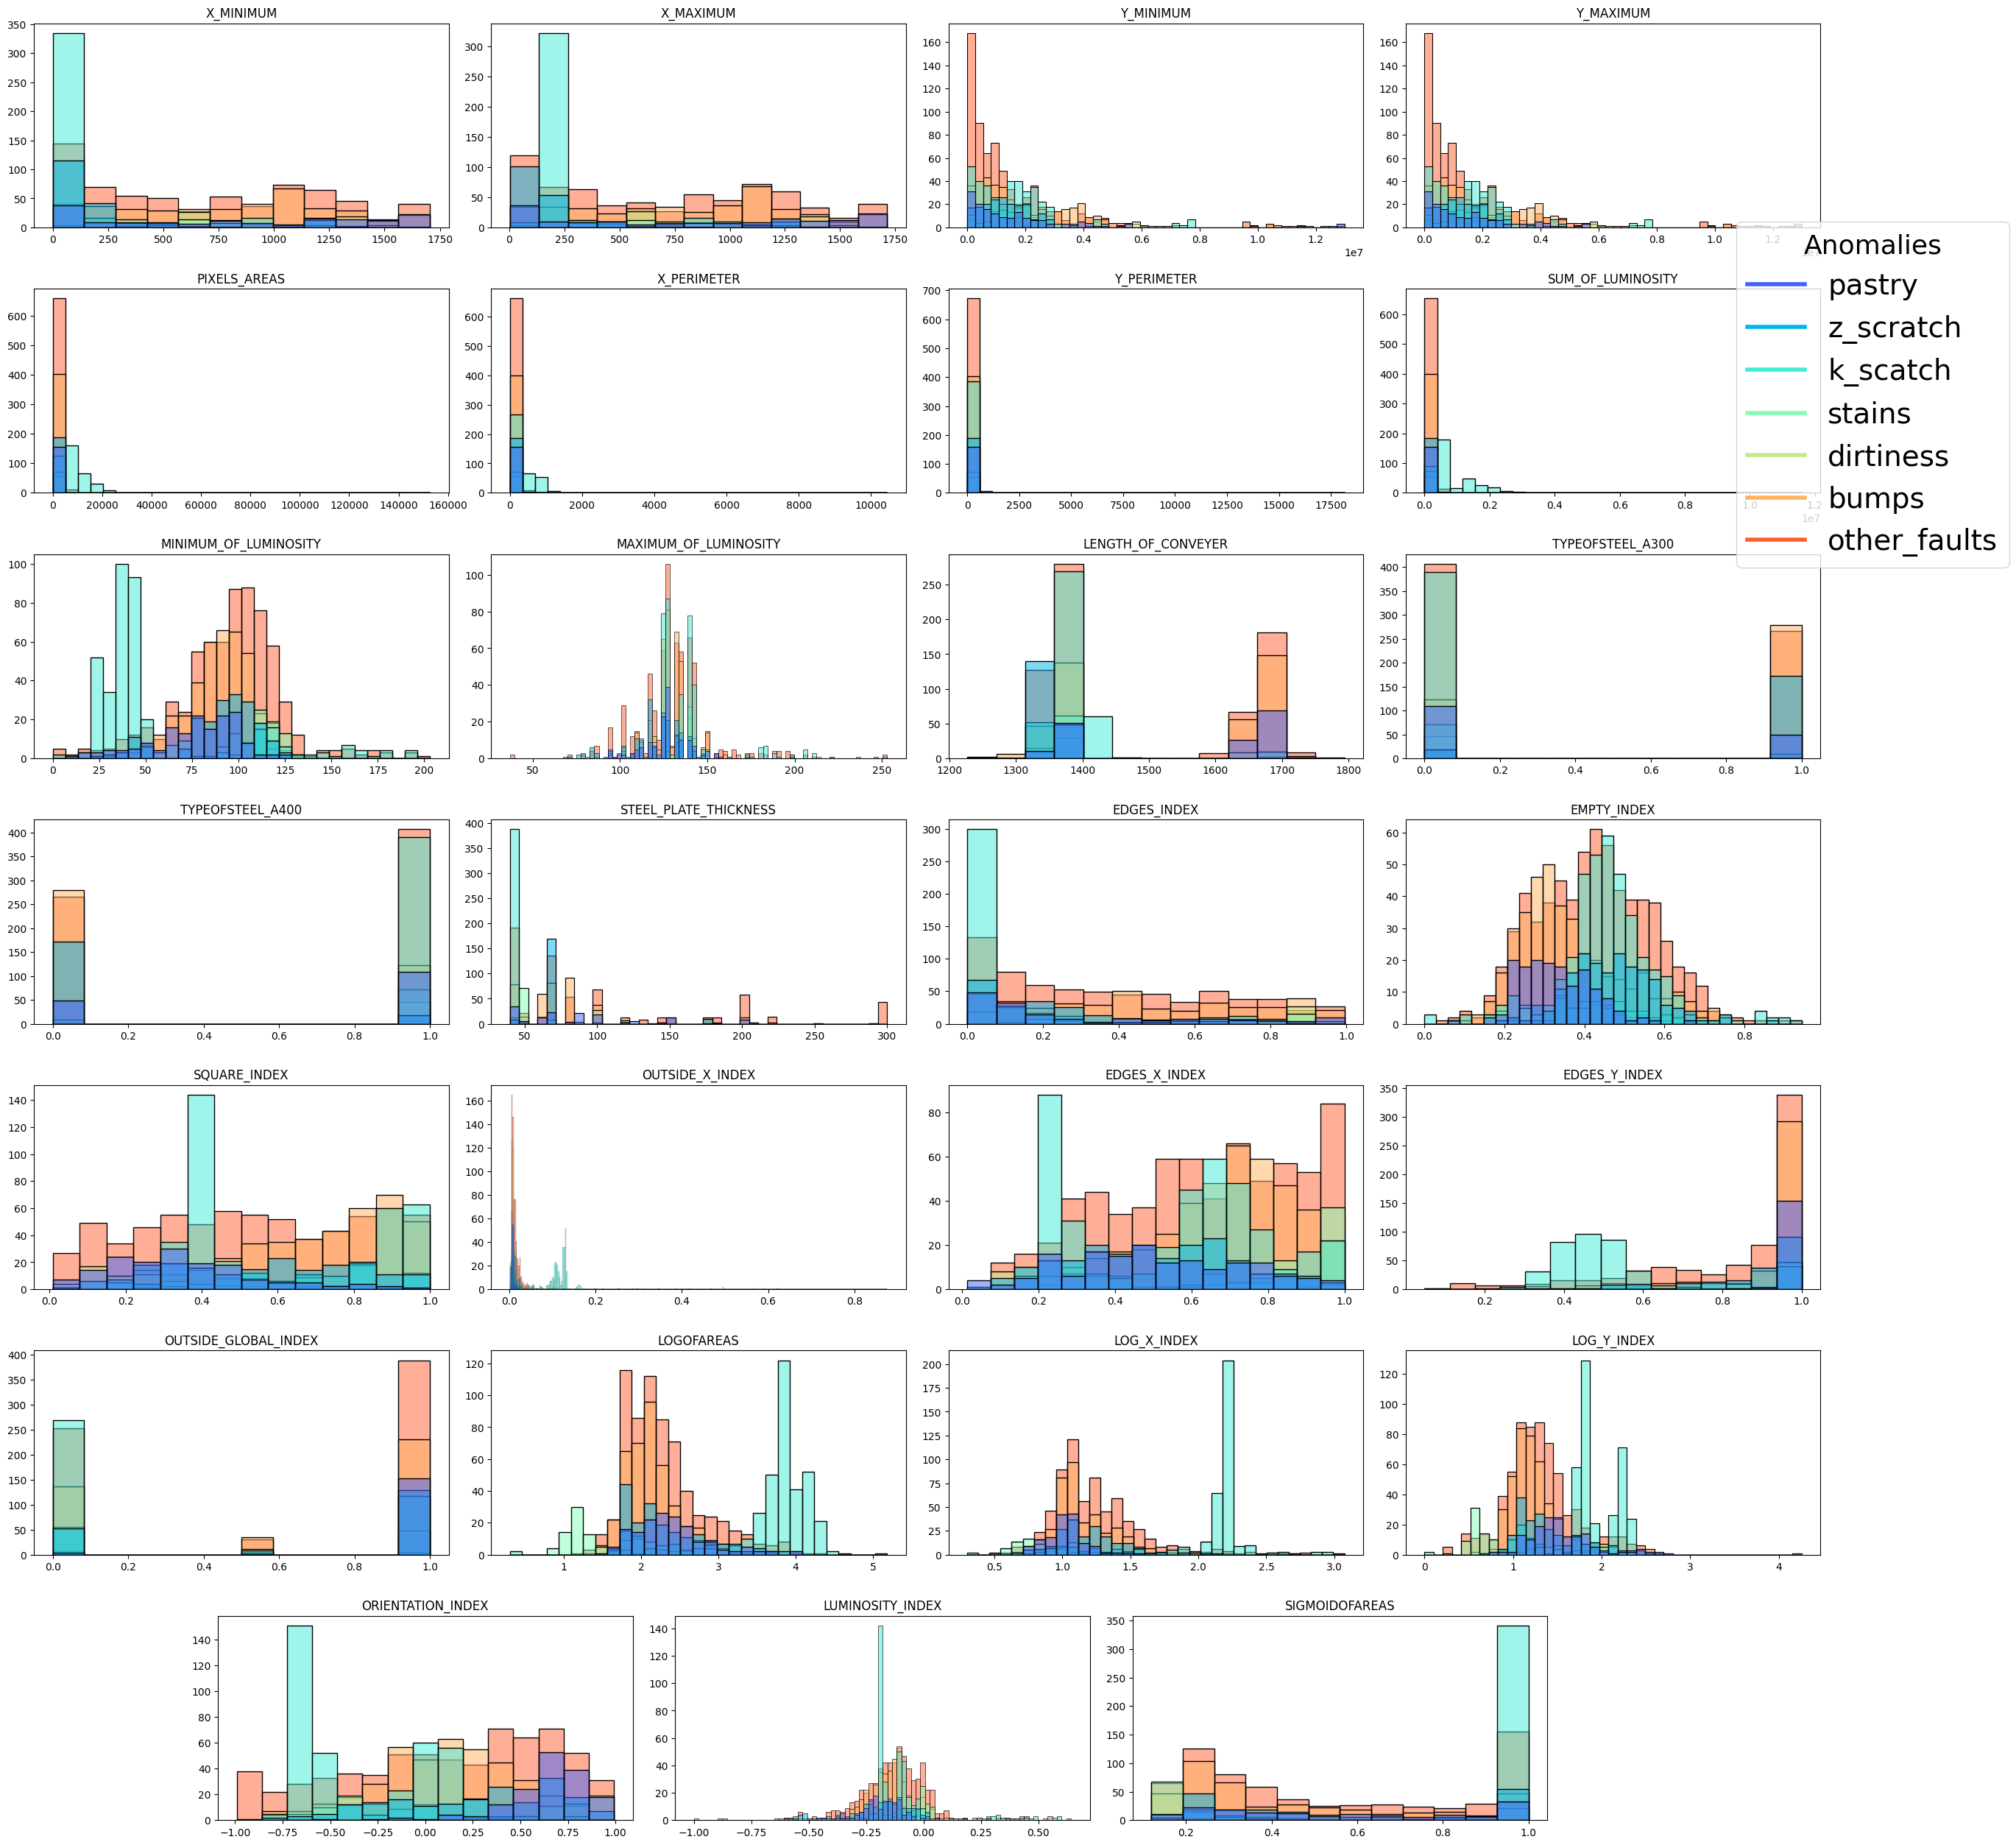

In [ ]:
# check the distributions of the features
fig, ax = plt.subplots(7, 4, figsize = (25, 25))
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

palette_hist = sns.color_palette('rainbow', n_colors = len(df['anomaly'].unique()))
hue_order = df['anomaly'].unique()

for index, col in enumerate(feat_col[:4]):
    sns.histplot(df, x = col, hue = 'anomaly', palette = palette_hist, hue_order = hue_order, ax = ax[0][index], legend = False)
    ax[0][index].set_title(col.upper())
    ax[0][index].set_ylabel('')
    ax[0][index].set_xlabel('')
for index, col in enumerate(feat_col[4:8]):
    sns.histplot(df, x = col, hue = 'anomaly', palette = palette_hist, hue_order = hue_order, ax = ax[1][index], legend = False, bins = 30)
    ax[1][index].set_title(col.upper())
    ax[1][index].set_ylabel('')
    ax[1][index].set_xlabel('')
for index, col in enumerate(feat_col[8:12]):
    sns.histplot(df, x = col, hue = 'anomaly', palette = palette_hist, hue_order = hue_order, ax = ax[2][index], legend = False)
    ax[2][index].set_title(col.upper())
    ax[2][index].set_ylabel('')
    ax[2][index].set_xlabel('')
for index, col in enumerate(feat_col[12:16]):
    sns.histplot(df, x = col, hue = 'anomaly', palette = palette_hist, hue_order = hue_order, ax = ax[3][index], legend = False)
    ax[3][index].set_title(col.upper())
    ax[3][index].set_ylabel('')
    ax[3][index].set_xlabel('')
for index, col in enumerate(feat_col[16:20]):
    sns.histplot(df, x = col, hue = 'anomaly', palette = palette_hist, hue_order = hue_order, ax = ax[4][index], legend = False)
    ax[4][index].set_title(col.upper())
    ax[4][index].set_ylabel('')
    ax[4][index].set_xlabel('')
for index, col in enumerate(feat_col[20:24]):
    sns.histplot(df, x = col, hue = 'anomaly', palette = palette_hist, hue_order = hue_order, ax = ax[5][index], legend = False)
    ax[5][index].set_title(col.upper())
    ax[5][index].set_ylabel('')
    ax[5][index].set_xlabel('')
for index, col in enumerate(feat_col[24:27]):
    sns.histplot(df, x = col, hue = 'anomaly', palette = palette_hist, hue_order = hue_order, ax = ax[6][index], legend = False)
    ax[6][index].set_title(col.upper())
    ax[6][index].set_ylabel('')
    ax[6][index].set_xlabel('')

fig.delaxes(ax[6][3])
for i in range(3):
    pos = ax[6][i].get_position()  
    new_x0 = pos.x0 + 0.1          
    new_x1 = pos.x1 + 0.1          
    ax[6][i].set_position([new_x0, pos.y0, pos.width, pos.height])  

colors = sns.color_palette('rainbow', len(target_cols))
handles = [plt.Line2D([0], [0], color = colors[i], lw = 4, label = str(target_cols[i])) for i in range(len(target_cols))]

fig.legend(handles, [str(u) for u in target_cols], title = "Anomalies", loc = "center right", bbox_to_anchor = (1.1, 0.79), prop = {'size': 28}, title_fontsize = 26)

plt.savefig('images/feat_hist.jpg', dpi = 700)
plt.show()

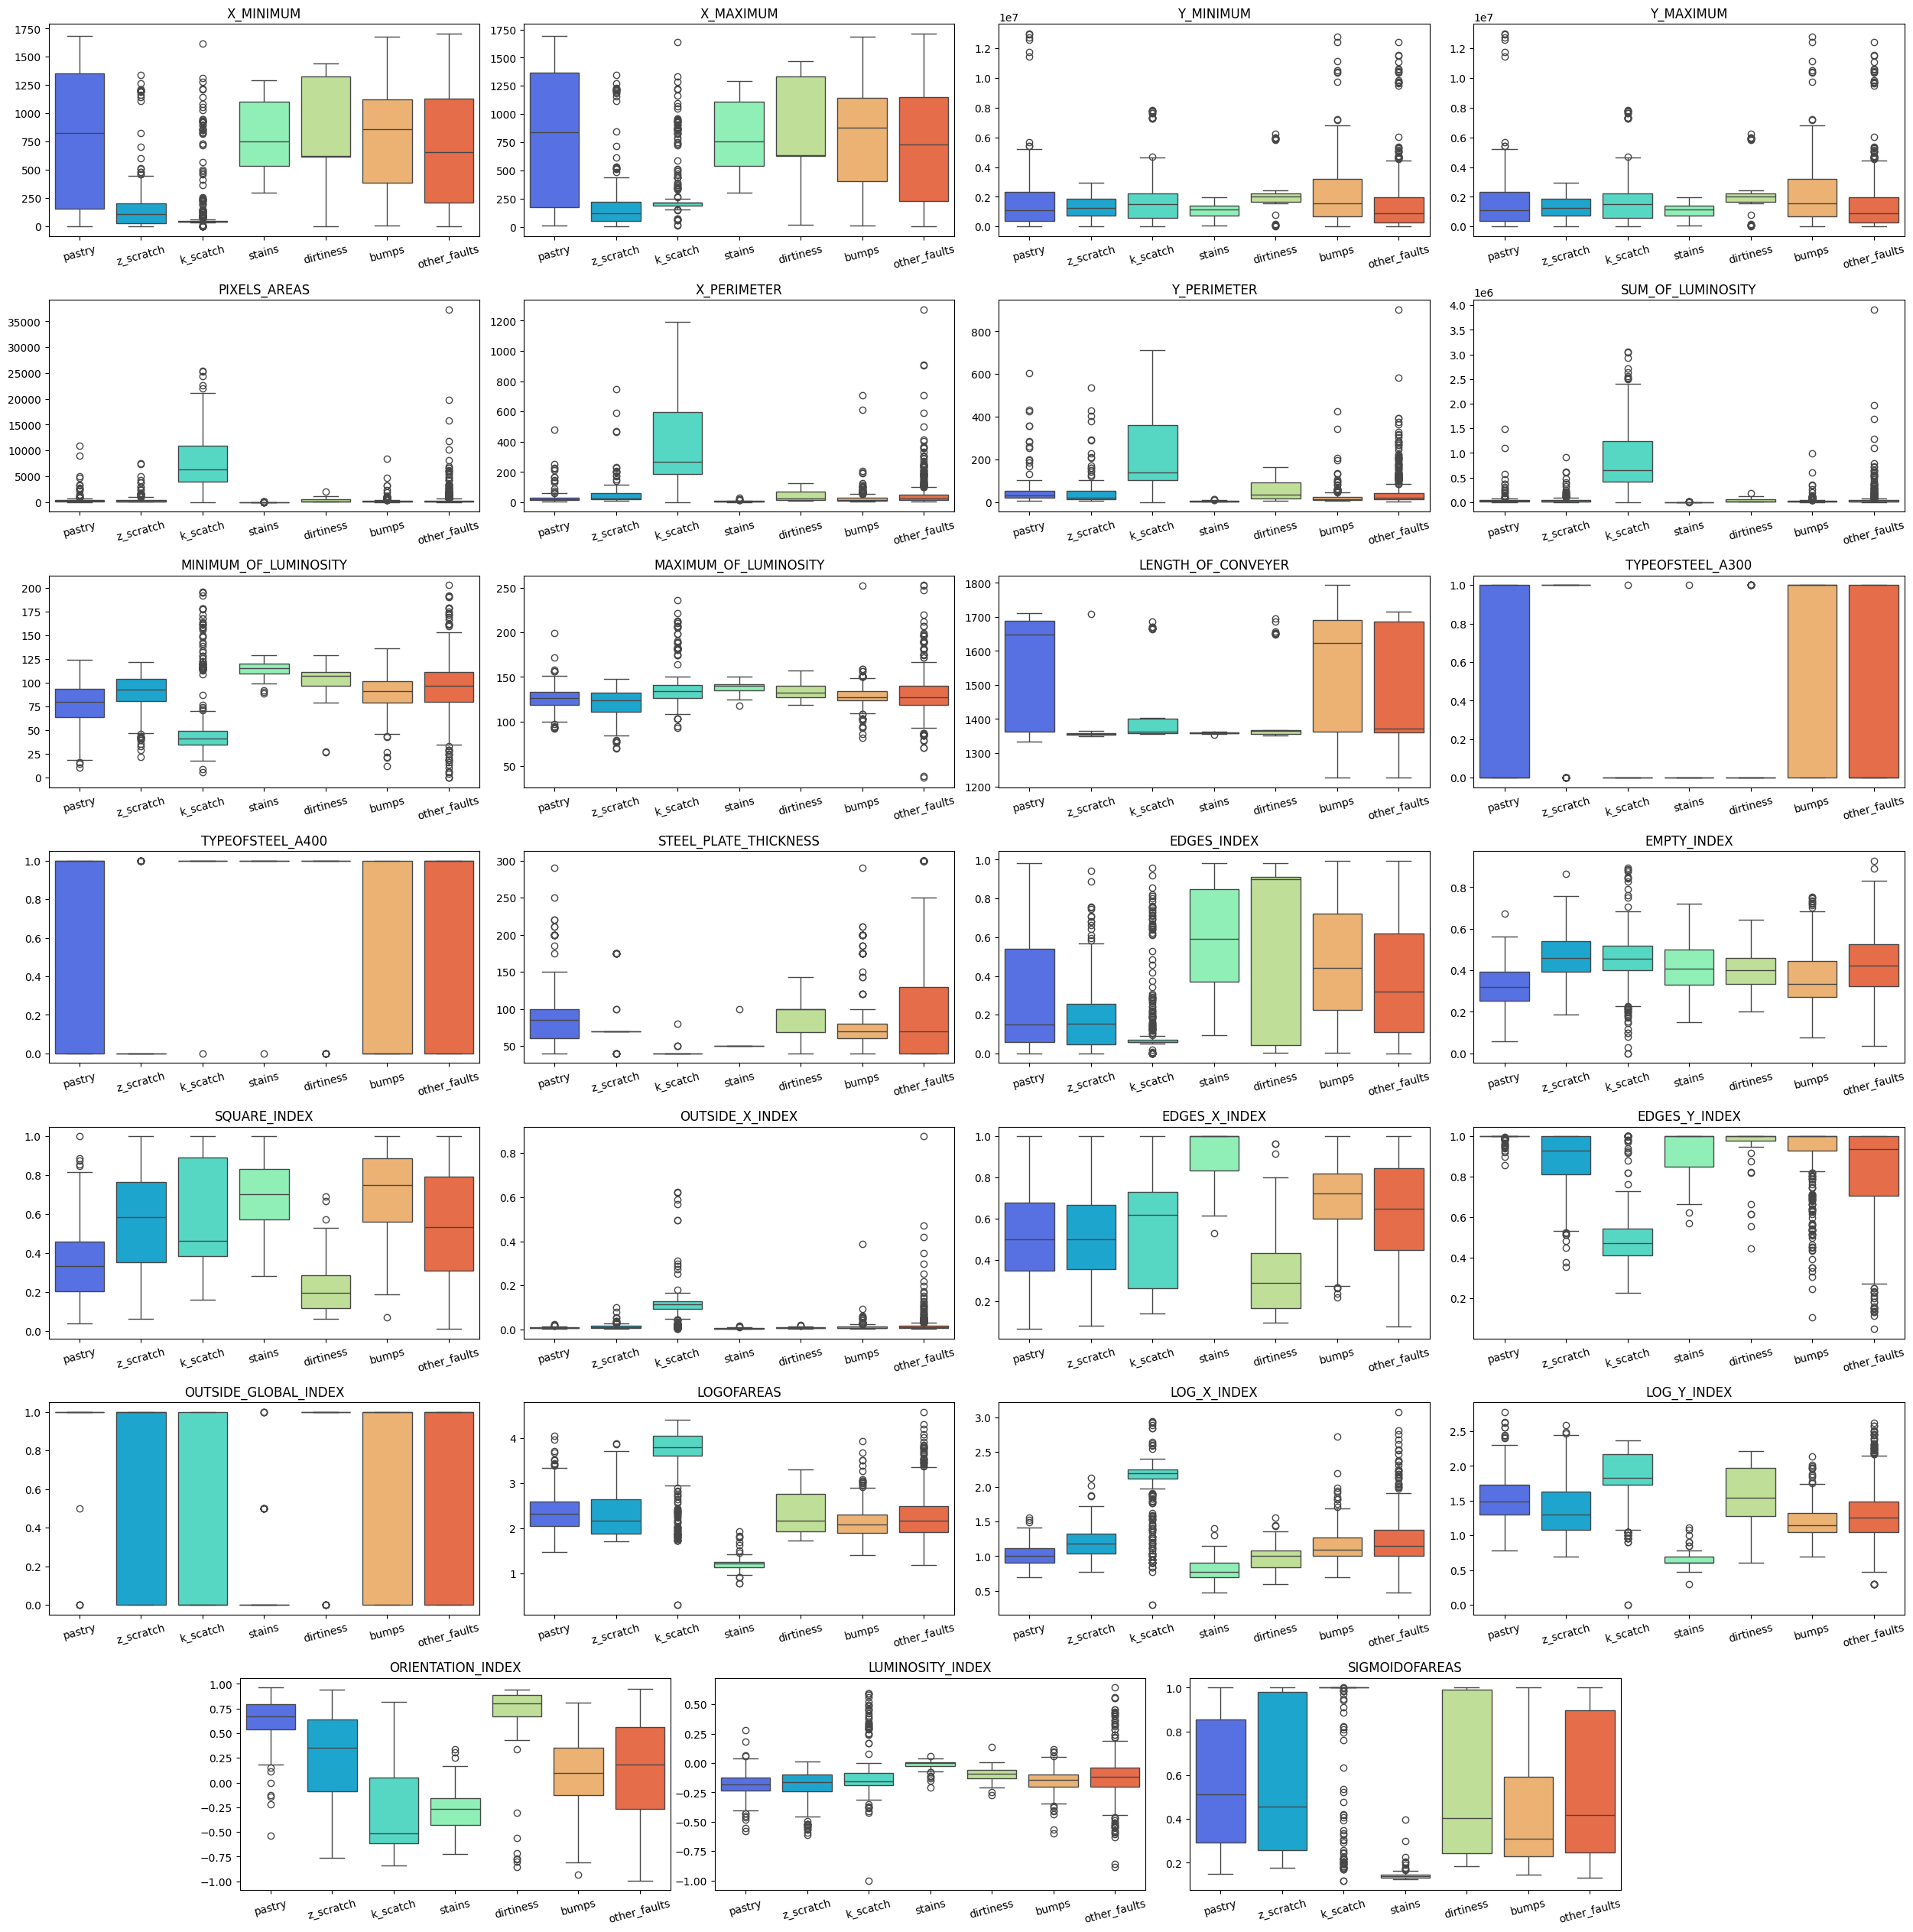

In [ ]:
#df.drop(391, inplace = True) # remove troublesome outlier

# boxplots of the features
fig, ax = plt.subplots(7, 4, figsize = (25, 25))
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

for index, col in enumerate(feat_col[:4]):
    sns.boxplot(data = df, x = 'anomaly', y = col, hue = 'anomaly', legend = False, palette = palette_hist, ax = ax[0][index])
    ax[0][index].set_xticks(ticks = [0, 1, 2, 3, 4, 5, 6], labels = target_cols, rotation = 15)
    ax[0][index].set_title(col.upper())
    ax[0][index].set_ylabel('')
    ax[0][index].set_xlabel('')
for index, col in enumerate(feat_col[4:8]):
    sns.boxplot(data = df, x = 'anomaly', y = col, hue = 'anomaly', legend = False, palette = palette_hist, ax = ax[1][index])
    ax[1][index].set_xticks(ticks = [0, 1, 2, 3, 4, 5, 6], labels = target_cols, rotation = 15)
    ax[1][index].set_title(col.upper())
    ax[1][index].set_ylabel('')
    ax[1][index].set_xlabel('')
for index, col in enumerate(feat_col[8:12]):
    sns.boxplot(data = df, x = 'anomaly', y = col, hue = 'anomaly', legend = False, palette = palette_hist, ax = ax[2][index])
    ax[2][index].set_xticks(ticks = [0, 1, 2, 3, 4, 5, 6], labels = target_cols, rotation = 15)
    ax[2][index].set_title(col.upper())
    ax[2][index].set_ylabel('')
    ax[2][index].set_xlabel('')
for index, col in enumerate(feat_col[12:16]):
    sns.boxplot(data = df, x = 'anomaly', y = col, hue = 'anomaly', legend = False, palette = palette_hist, ax = ax[3][index])
    ax[3][index].set_xticks(ticks = [0, 1, 2, 3, 4, 5, 6], labels = target_cols, rotation = 15)
    ax[3][index].set_title(col.upper())
    ax[3][index].set_ylabel('')
    ax[3][index].set_xlabel('')
for index, col in enumerate(feat_col[16:20]):
    sns.boxplot(data = df, x = 'anomaly', y = col, hue = 'anomaly', legend = False, palette = palette_hist, ax = ax[4][index])
    ax[4][index].set_xticks(ticks = [0, 1, 2, 3, 4, 5, 6], labels = target_cols, rotation = 15)
    ax[4][index].set_title(col.upper())
    ax[4][index].set_ylabel('')
    ax[4][index].set_xlabel('')
for index, col in enumerate(feat_col[20:24]):
    sns.boxplot(data = df, x = 'anomaly', y = col, hue = 'anomaly', legend = False, palette = palette_hist, ax = ax[5][index])
    ax[5][index].set_xticks(ticks = [0, 1, 2, 3, 4, 5, 6], labels = target_cols, rotation = 15)
    ax[5][index].set_title(col.upper())
    ax[5][index].set_ylabel('')
    ax[5][index].set_xlabel('')
for index, col in enumerate(feat_col[24:27]):
    sns.boxplot(data = df, x = 'anomaly', y = col, hue = 'anomaly', legend = False, palette = palette_hist, ax = ax[6][index])
    ax[6][index].set_xticks(ticks = [0, 1, 2, 3, 4, 5, 6], labels = target_cols, rotation = 15)
    ax[6][index].set_title(col.upper())
    ax[6][index].set_ylabel('')
    ax[6][index].set_xlabel('')

fig.delaxes(ax[6][3])
for i in range(3):
    pos = ax[6][i].get_position()  
    new_x0 = pos.x0 + 0.1          
    new_x1 = pos.x1 + 0.1          
    ax[6][i].set_position([new_x0, pos.y0, pos.width, pos.height])  

plt.savefig('images/feat_boxplot.png', dpi = 700)
plt.show()

In [ ]:
# check for binary features
for col in feat_col:
    if len(df[col].unique()) <= 2:
        print(f'Feature {col} has binary data (e.g. 0-1)')

# also check 'outside_global_index' feature
unique_ogi = df['outside_global_index'].unique()
print(f'Feature outside_global_index has {len(unique_ogi)} unique values, which are {str(unique_ogi).strip("[").strip("]")}')

Feature typeofsteel_a300 has binary data (e.g. 0-1)
Feature typeofsteel_a400 has binary data (e.g. 0-1)
Feature outside_global_index has 3 unique values, which are 1.  0.5 0. 
